## Numerical differentiation and spectral derivatives


In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fft2, ifft, ifft2, fftfreq, fftshift
import pandas as pd


In this first task, you are ask to compare various
method to differentiate functions or data numerically.

Assume we have a function $f \in C_p^k(0,L)$ (the space of
$k$ times continuously differentiable, $L$-period functions).

Given a set of $N$ equi-distributed sampling points 
$x_l = l N/L, l =0,\ldots, N-1$ with distance 
$h = N/L$, we denote by
$\boldsymbol{f} = \{f(x_l)\}_{l=0}^{N-1} \in \mathbb{R}^N$
the corresponding vector of the samples of $f$
and write $\boldsymbol{f}(l) = f(x_l)$.

Consider the following 
4 ways to approximate the derivative of $f$ at $x_l$:

\begin{align}
\text{Forward difference } 
&\partial^+ \boldsymbol{f}(l) = \dfrac{\boldsymbol{f}_{l+1} - \boldsymbol{f}_l}{h}
\\
\text{Backward difference } 
&\partial^- \boldsymbol{f}(l) = \dfrac{\boldsymbol{f}_l - \boldsymbol{f}_{l-1}}{h}
\\
\text{Central difference } 
&\partial^\circ \boldsymbol{f}(l) = \dfrac{\boldsymbol{f}_{l+1} - \boldsymbol{f}_{l-1}}{2h}
\\
\text{Spectral derivative } 
&\partial^{\mathcal{F}} \boldsymbol{f}(l) = 
\mathcal{F}^{-1}_N(
    i \textbf{k}
\mathcal{F}_N(\boldsymbol{f})
)(l)
\end{align}

Here $\mathbf{k}$
 is the wave number vector
$2\pi (0,1,\ldots,N/2-1,-N/2,-N/2+1,\ldots,-1)$,


### Aproximation properties of the finite difference operators

Assuming that the function $f$ is sufficiently differentiable, show that the following estimates hold:

\begin{align}
\partial^+f(x_k) - f'(x_k) &= \mathcal{O}(h) = \mathcal{O}(N^{-1}) \\
\partial^-f(x_k) - f'(x_k) &= \mathcal{O}(h) = \mathcal{O}(N^{-1}) \\
\partial^\circ f(x_k) - f'(x_k) &= \mathcal{O}(h^2) = \mathcal{O}(N^{-2})
\end{align}

for $h \to 0$ (respectively $N \to \infty$).

**Hint**: Use Taylor expansion of $f$ around $x_k$.



**Proof**:

1. **Forward difference**:
    Using Taylor expansion around $x_k$:
    $$
    f(x_{k+1}) = f(x_k) + h f'(x_k) + \frac{h^2}{2} f''(x_k) + \mathcal{O}(h^3)
    $$
    Therefore,
    $$
    \partial^+ f(x_k) = \frac{f(x_{k+1}) - f(x_k)}{h} = f'(x_k) + \frac{h}{2} f''(x_k) + \mathcal{O}(h^2)
    $$
    Hence,
    $$
    \partial^+ f(x_k) - f'(x_k) = \frac{h}{2} f''(x_k) + \mathcal{O}(h^2) = \mathcal{O}(h)
    $$

    2. **Backward difference**:
    Using Taylor expansion around $x_k$:
    $$
    f(x_{k-1}) = f(x_k) - h f'(x_k) + \frac{h^2}{2} f''(x_k) - \mathcal{O}(h^3)
    $$
    Therefore,
    $$
    \partial^- f(x_k) = \frac{f(x_k) - f(x_{k-1})}{h} = f'(x_k) -\frac{h}{2} f''(x_k) + \mathcal{O}(h^2)
    $$
    Hence,
    $$
    \partial^- f(x_k) - f'(x_k) = \frac{h}{2} f''(x_k) + \mathcal{O}(h^2) = \mathcal{O}(h)
    $$

    3. **Central difference**:
    Using Taylor expansion around $x_k$:
    $$
    f(x_{k+1}) = f(x_k) + h f'(x_k) + \frac{h^2}{2} f''(x_k) + \frac{h^3}{6} f''(x_k) \mathcal{O}(h^4)
    $$
    $$
    f(x_{k-1}) = f(x_k) - h f'(x_k) + \frac{h^2}{2} f''(x_k) - \frac{h^3}{6} f''(x_k) \mathcal{O}(h^4)
    $$
    Therefore,
    $$
    \partial^\circ f(x_k) = \frac{f(x_{k+1}) - f(x_{k-1})}{2h} = f'(x_k) +  \frac{h^2}{3} f''(x_k) + \mathcal{O}(h^3)
    $$
    Hence,
    $$
    \partial^\circ f(x_k) - f'(x_k) = \mathcal{O}(h^2)
    $$


### Numerical experiments

Next, we implement the 4 numerical differentiation methods and compare their performance on the functions
$$
f(x) = 0.1 e^{1+\sin(x)} + 0.1 \sin(4x)
$$
given on the interval $[0,2\pi)$.

First, for four different sampleing sizes $N = 4, 8, 12, 16$, plot the exact derivate $f'(x)$ and the corresponding 4 different approximations.
Afterward, perform a convergence study of the error of the various numerical differentiation methods,
for $N  = 4, 8, 12, 16, 20, 24, 28, 32, 36$ and tabulate the error and the convergence rate of the numerical differentiation methods.
Discuss the results and estimate **theoretically** based on your tabulated values, how large $N$ should be chosen 
so that the forward/backward/central finite differences obtain a given accuracy as the spectral derivative for $N=24$.

**Solution**

In [4]:
# Forward Euler
def df_forward(f, x):
    dx = x[1] - x[0]
    df = np.zeros_like(x)
    df[:-1] = (f(x[1:]) - f(x[:-1]))/dx
    df[-1] = (f(x[0]) - f(x[-1]))/dx
    return df

# Backward Euler
def df_backward(f, x):
    dx = x[1] - x[0]
    df = np.zeros_like(x)
    df[1:] = (f(x[1:]) - f(x[:-1]))/dx
    df[0] = (f(x[0]) - f(x[-1]))/dx
    return df

# Central difference
def df_central(f, x):
    dx = x[1] - x[0]
    df = np.zeros_like(x)
    df[1:-1] = (f(x[2:]) - f(x[:-2]))/(2*dx)
    df[0] = (f(x[1]) - f(x[-1]))/(2*dx)
    df[-1] = (f(x[0]) - f(x[-2]))/(2*dx)
    return df

# Very important:
# Use arange instead of linspace to obtain half-open intervals
# This is important since we have periodic boundary conditions!
def df_spectral(f, x):
    # f_hat = fft(f(x))
    # N, dx = len(x), (x[1] - x[0])
    # k = fftfreq(N, d=dx/(2*np.pi))
    # df_hat = 1j * k * f_hat
    # df = ifft(df_hat).real
    # return df
    # One-liner
    return ifft(1j*fftfreq(len(x), (x[1] - x[0])/(2*np.pi))*fft(f(x))).real

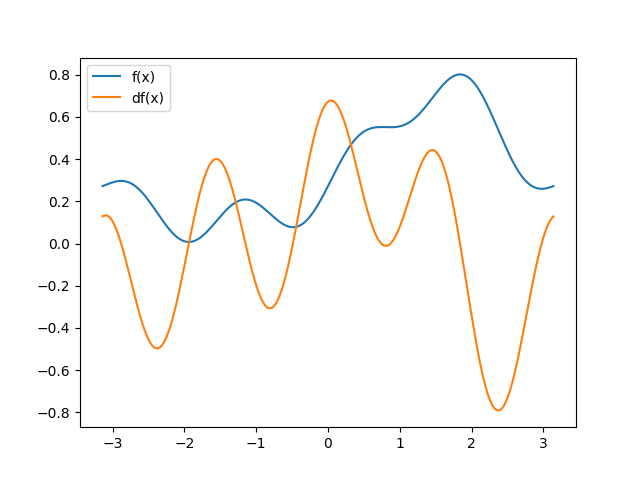

In [5]:
L = 2*np.pi
# L = np.pi
N = 20
dx = L/N
# Note that we do not need to include the last point
# due to the periodic boundary conditions
x = np.arange(-L/2, L/2, dx)

# Define a function and its derivative
# f = lambda x: np.cos(x) + 0.5*np.sin(4*x) 
# df = lambda x: -np.sin(x) + 0.4*np.cos(4*x)

f = lambda x:  0.1*np.exp(1+np.sin(x)) + 0.1*np.sin(4*x)
df = lambda x: 0.1*np.cos(x)*np.exp(1+np.sin(x)) + 0.4*np.cos(4*x)


# plt.plot(x, f(x), label='f(x)')
# Define finer grid for plotting the exact solution

xfine = np.linspace(-L/2, L/2, 10*N)
plt.plot(xfine, f(xfine), label='f(x)')
plt.plot(xfine, df(xfine), label='df(x)')
plt.legend()


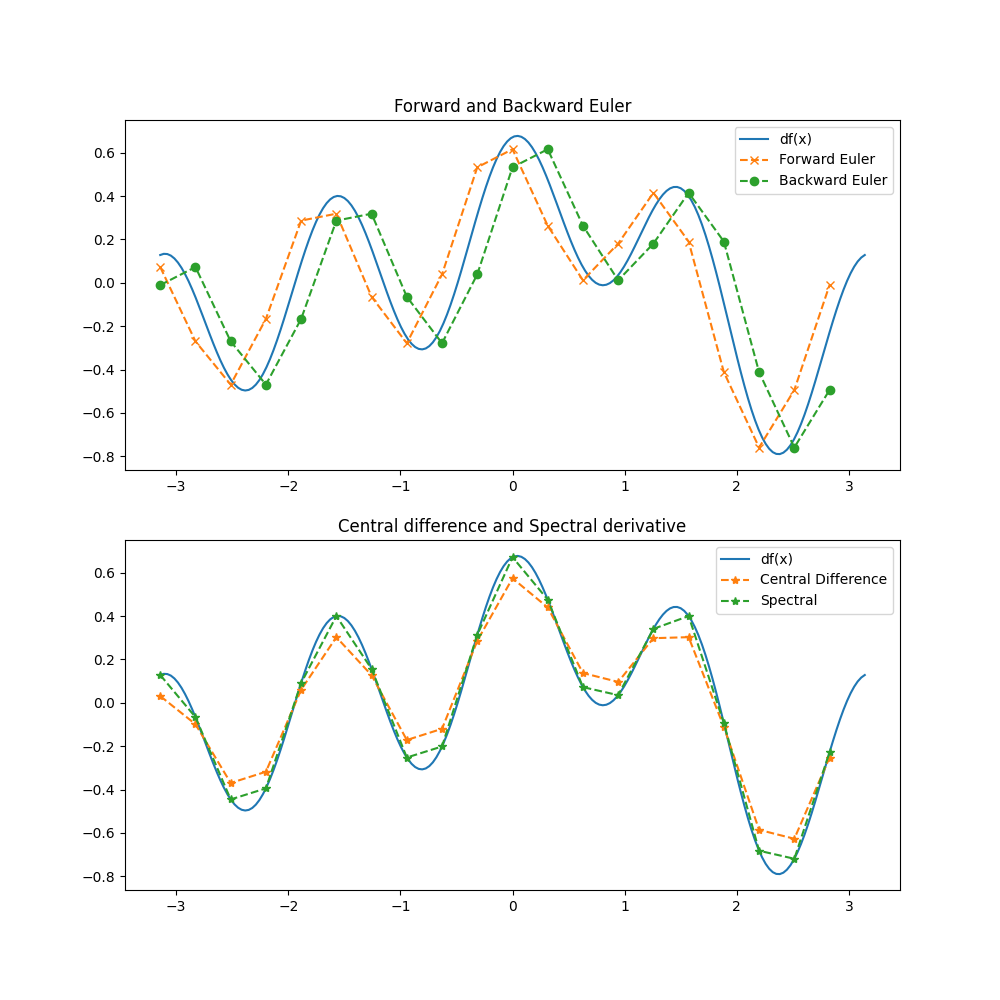

In [7]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# plt.plot(xfine, df(xfine), label='df(x)')
# plt.plot(x, df_forward(f, x),  "--x", label='Forward Euler')
# plt.plot(x, df_backward(f, x), "--o", label='Backward Euler')
# plt.plot(x, df_central(f, x),  "--*", label='Central Difference')
# plt.plot(x, df_spectral(f, x),  "--*", label='Spectral')
# plt.legend()

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# First subplot: df, Forward Euler, Backward Euler
axes[0].plot(xfine, df(xfine), label='df(x)')
axes[0].plot(x, df_forward(f, x),  "--x", label='Forward Euler')
axes[0].plot(x, df_backward(f, x), "--o", label='Backward Euler')
axes[0].legend()
axes[0].set_title('Forward and Backward Euler')

# Second subplot: df, Central Euler, Spectral
axes[1].plot(xfine, df(xfine), label='df(x)')
axes[1].plot(x, df_central(f, x),  "--*", label='Central Difference')
axes[1].plot(x, df_spectral(f, x),  "--*", label='Spectral')
axes[1].legend()
axes[1].set_title('Central difference and Spectral derivative')

plt.show()

In [8]:
f = lambda x: np.exp(1+np.sin(x)) 
df = lambda x: np.cos(x)*np.exp(1+np.sin(x))

def compute_eoc(f, df, L, N_list, df_num):
    errs = []
    for N in N_list:
        dx = L/N
        x = np.arange(-L/2, L/2, dx)
        errs.append(np.linalg.norm( df(x) - df_num(f, x), np.inf))
        # print(f'N = {N}, error = {errs[-1]}')
    errs = np.array(errs)
    N_list = np.array(N_list)
    eocs = np.log(errs[1:]/errs[:-1])/np.log(N_list[:-1]/N_list[1:])
    eocs = np.insert(eocs, 0, np.inf)
    return errs, eocs
    
N_list = [4 + 4*k for k in range(0,9)]
print(N_list)

[4, 8, 12, 16, 20, 24, 28, 32, 36]


In [9]:
table = pd.DataFrame(index=N_list)
# for method in [df_forward, df_backward, df_central]:
for method in [df_forward, df_backward, df_central, df_spectral]:
    errs, eocs = compute_eoc(f, df, L, N_list, method)
    table[method.__name__ + " err"] = errs
    table[method.__name__ + " eoc"] = eocs

display(table)

,df_forward err,df_forward eoc,df_backward err,df_backward eoc,df_central err,df_central eoc,df_spectral err,df_spectral eoc
4,2.973507,inf,2.973507,inf,0.684582,inf,4.762462e-01,inf
8,2.388684,0.315950,2.388684,0.315950,0.924764,-0.433862,1.173730e-02,5.342535
12,1.769479,0.740033,1.769479,0.740033,0.454949,1.749483,1.039718e-04,11.656754
16,1.379133,0.866339,1.379133,0.866339,0.254400,2.020550,4.789322e-07,18.702299
20,1.123439,0.918962,1.123439,0.918962,0.177066,1.624000,1.355863e-09,26.293035
24,0.945513,0.945701,0.945513,0.945701,0.121010,2.087785,2.633005e-12,34.247554
28,0.815314,0.961105,0.815314,0.961105,0.090739,1.867574,7.549517e-15,37.978409
32,0.716189,0.970778,0.716189,0.970778,0.070220,1.919797,7.727152e-14,-17.417941
36,0.638321,0.977245,0.638321,0.977245,0.054645,2.129186,8.304468e-14,-0.611746


**Discussion.**
  * The forward and backward difference operators have a first order convergence rate, while the central difference operator has a second order convergence rate. This can be clearly seen in the convergence study, where double the number of sampling points reduces the error by a factor of 4 for the central difference operator, but only by a factor of 2 for the forward and backward difference operators.
  * The spectral derivative has a much higher convergence rate than the finite difference operators. For $N=28$, the error of the spectral derivative is already roughly at machine precisison.
  Consequently, the error of the spectral derivative cannot get smaller for N roughly larger than 24, which is why we don't observe any positive convergence rate for $N>28$.